# Final Proyect human vs horse clasification

Class: Deep Learning.

Profesor: Leonardo Garrido

Students:
- Emiliano Etienne A00825249
- Jorge Viera

The objective of this project is to use the model programmed in previuos homeworks and fine-tune it's parameters to classify a dataset composed of images of horses and humans.

In [1]:
#Usual imports
import matplotlib.pyplot as plt
import numpy as np
from dnn_app_utils_v3 import *
import pandas as pd

## The dataset

The dataset cointains images from horses and humans and it is already separeted into a train and validation set.

As the deep learning methodology requires it we need three datasets, one for training, another for developing or validation and finally one for testing, as this dataset is just divided into a training and dev samples we are going to separate the dev to create the test sample.

Sizes of the samples:
- Training set: 1027
- Val or Dev set: 128
- Test set: 128

All these dataset are well balanced (50% humans and 50% horses)

The dataset was gather by Laurence Moroney and you can get it at https://laurencemoroney.com/datasets.html


#### It is very important that the dataset is inside the directory were the notebook is.

In [2]:
import os

#declare the raltive paths.
directory_train_horses_s = 'horse-or-human/train/horses'
directory_train_human_s = 'horse-or-human/train/humans'
directory_val_horses_s = 'horse-or-human/validation/horses'
directory_val_humans_s = 'horse-or-human/validation/humans'


directory_train_horses = os.fsencode(directory_train_horses_s)
directory_train_human = os.fsencode(directory_train_human_s )
directory_val_horses = os.fsencode(directory_val_horses_s)
directory_val_humans = os.fsencode(directory_val_humans_s)

#List to save the image matrices.
trainset = []
trainset_target = []
valset = []
valset_target = []
testset = []
testset_target = []


#Read each image and store it's matrix in their respective list.
for file in os.listdir(directory_train_horses):
    filename = os.fsdecode(file)
    im = plt.imread('horse-or-human/train/horses/'+str(filename))
    trainset.append(im)
    trainset_target.append(1)

for file in os.listdir(directory_train_human):
    filename = os.fsdecode(file)
    im = plt.imread('horse-or-human/train/humans/'+str(filename))
    trainset.append(im)
    trainset_target.append(0)


c1 = 0
for file in os.listdir(directory_val_horses):
    filename = os.fsdecode(file)
    im = plt.imread('horse-or-human/validation/horses/'+str(filename))
    if c1 < 64:
        valset.append(im)
        valset_target.append(1)
    else:
        testset.append(im)
        testset_target.append(1)
    c1 = c1 + 1


c2 = 0
for file in os.listdir(directory_val_humans):
    filename = os.fsdecode(file)
    im = plt.imread('horse-or-human/validation/humans/'+str(filename))
    if c2 < 64:
        valset.append(im)
        valset_target.append(0)
    else:
        testset.append(im)
        testset_target.append(0)
    c2 = c2 + 1

In [3]:
#Checking if the test and validation set was separeted correctly
(np.array(testset)).shape

(128, 300, 300, 4)

In [4]:
#We can verify with this example that the values of the image matrices are between 0 and 1
trainset[1]

array([[[0.4627451 , 0.63529414, 0.8862745 , 1.        ],
        [0.4627451 , 0.63529414, 0.8862745 , 1.        ],
        [0.45882353, 0.63529414, 0.8862745 , 1.        ],
        ...,
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ]],

       [[0.45882353, 0.6392157 , 0.8901961 , 1.        ],
        [0.4627451 , 0.6392157 , 0.8901961 , 1.        ],
        [0.4627451 , 0.6392157 , 0.8901961 , 1.        ],
        ...,
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ]],

       [[0.45882353, 0.6392157 , 0.8901961 , 1.        ],
        [0.4627451 , 0.6392157 , 0.8901961 , 1.        ],
        [0.4627451 , 0.6392157 , 0.8901961 , 1.        ],
        ...,
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.      

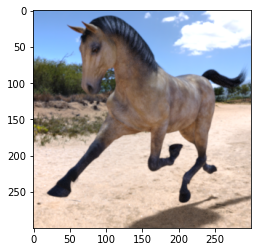

In [5]:
#To show one image;
plt.imshow(trainset[1])

## Data preprocessing.

The data processing it's going to consist in:

1. #### Flatten the array
This means that each image matrix that has dimensions (300,300,4) will be converted into a one dimensional array of lenght 300x300x4 = 360000.

2. #### Apply Principal component analysis (PCA)
Because of the high dimensionality of the problem it is convinient to apply PCA to reduce considerably the dimensions and the computational training time. Also PCA ensures that the variance is preserved.


In [6]:
from sklearn.decomposition import PCA #Importing PCA from sklearn

pca = PCA(1027) #We are going to reduce the dimensionality from 360000 to 1027

#Trainset
X_train = (np.array(trainset))
X_train = (X_train.reshape(X_train.shape[0],-1))#Flatten the array
X_train = pca.fit_transform(X_train)#Apply PCA


In [7]:

#Trainset
Y_train = (np.array(trainset_target))
Y_train = Y_train.reshape(1,1027)

#Validation Set
X_val = (np.array(valset))
X_val = X_val.reshape(X_val.shape[0],-1)#Flatten the array
X_val = pca.transform(X_val)#Apply PCA

Y_val = (np.array(valset_target))
Y_val = Y_val.reshape(1,128)

#Test Set
X_test = (np.array(testset))
X_test = X_test.reshape(X_test.shape[0],-1)#Flatten the array
X_test = pca.transform(X_test)#Apply PCA

Y_test = (np.array(testset_target))
Y_test = Y_test.reshape(1,128)

#Getting the shapes of each array.
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(1027, 1027)
(1, 1027)
(128, 1027)
(1, 128)
(128, 1027)
(1, 128)


## The Model

We are going to use a Feedforward Neural Network which was programmed in previous homeworks.

In [9]:
# L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = [] 
    cost = 0                        # keep track of cost
    
    # Parameters initialization. 
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    #plt.plot(np.squeeze(costs))
    #plt.ylabel('cost')
    #plt.xlabel('iterations (per tens)')
    #plt.title("Learning rate =" + str(learning_rate))
    #plt.show()
    
    return parameters,cost

In [10]:
#To use the model.
#layers_dims = [1027,10,1]
#parameters, costs = L_layer_model(X_train.T, Y_train, layers_dims, num_iterations = 2500, print_cost = True)

We declare some functions that will help us in the next section.

In [11]:
from sklearn.metrics import f1_score, log_loss


def predict_g(X, y, parameters):
    """
    New predict function for hyperparameter-tunning
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    accuracy = np.sum((p == y)/m)
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    #print("Accuracy: "  + str(accuracy))
        
    return p, probas, accuracy

def model_grading(X, y, parameters):
    '''
    Function to get the important metrics of a clasification mmodel.
    Metrics: Accuracy, F1_score, precision, recall
    '''
    y_pred, y_pred_probas, accuracy = predict_g(X, y, parameters)

    f1 = f1_score(y,y_pred,average='micro')
    loss = compute_cost(y_pred_probas,y)

    return accuracy,f1,loss

    


## Hyper-parameter tunning

As we explained in our paper we follow the next steps to systematically find the best hyperparameters to have the model with the lowest variance and bias.

1. ### Randomized incremental testing.
To have an idea from where to start we conducted several incremental experiments which meant that we sould choose a hyperparameter and start increasing it between random tresholds. We found that the best values for each hyperparameters are around the "pivot values":

- Learning Rate = 0.01
- Number of neurons in hidden layers = 26 or 50
- Number of hidden layers = 4 or 5
- Number of iterations = 500 (At 500 iterations the loss function doesn't decrease very much and stabilizes)

2. ### From the pivot values, choose other values around them.
For time training porposes, for the number of hidden layers and the number of neurons in the hidden layers we choose especific values.

    The values for hyperparameter tunning are:

- Learning Rate = \[0.005,0.01,0.05\]
- Number of neurons in hidden layers = \[26, 45, 50, 60\]
- Number of hidden layers = \[4,5\]
- Number of iterations = \[150,250,500\]

3. ### Test all the combinations for these hyperparameters
A total of 72 models are going to be tested.

In [12]:
# 4-Layer model
#This cell takes time to run

#The hyperparameters to test
hyper_parameters = {
    'N_neurons' : [26,45,50,60],
    'Learning_Rate' : [0.005,0.01,0.05],
    'N_iterations' : [150,250,500]
}

#Keeping track of the values
summary = {
    'N_neurons' : [],
    'Learning_Rate' : [],
    'N_iterations' : [],
    'Train Accuracy' : [],
    'Train loss' : [],
    'Dev accuracy' : [],
    'Dev loss' : [],
    'F1 score' : []
}

for alfa in hyper_parameters['Learning_Rate']:
    for iterations in hyper_parameters['N_iterations']:
        for neurons in hyper_parameters['N_neurons']:
            layers_dims = [1027,neurons,neurons,neurons,neurons,1]
            parameters, train_cost= L_layer_model(X_train.T, Y_train, layers_dims, num_iterations = iterations)
            p, probas, train_accuracy = predict_g(X_train.T, Y_train, parameters)
            dev_accuracy, f1, dev_loss = model_grading(X_val.T, Y_val, parameters)

            print('Hyper-Parameters: (N_neurons='+str(neurons)+'), (Learning_rate='+str(alfa)+'), (N_iterations='+str(iterations)+')')
            print('Scores -->  Train_accuracy='+str(train_accuracy)+', Train_loss='+str(train_cost)+', Dev_accuracy='+str(dev_accuracy)+', Dev_loss='+str(dev_loss)+', F1_score='+str(f1))
            
            summary['N_neurons'].append(neurons)
            summary['Learning_Rate'].append(alfa)
            summary['N_iterations'].append(iterations)
            summary['Train Accuracy'].append(train_accuracy)
            summary['Train loss'].append(train_cost)
            summary['Dev accuracy'].append(dev_accuracy)
            summary['Dev loss'].append(dev_loss)
            summary['F1 score'].append(f1)
            
model_4_summary = pd.DataFrame(summary) #Create the dataframe which contains the summary of all the models

Hyper-Parameters: (N_neurons=26), (Learning_rate=0.005), (N_iterations=150)
Scores -->  Train_accuracy=0.9513145082765337, Train_loss=0.1686020987501498, Dev_accuracy=0.875, Dev_loss=0.7063413295978731, F1_score=0.8571428571428571
Hyper-Parameters: (N_neurons=45), (Learning_rate=0.005), (N_iterations=150)
Scores -->  Train_accuracy=0.9961051606621228, Train_loss=0.047616791446237094, Dev_accuracy=0.859375, Dev_loss=0.9321780308676125, F1_score=0.8363636363636363
Hyper-Parameters: (N_neurons=50), (Learning_rate=0.005), (N_iterations=150)
Scores -->  Train_accuracy=0.9961051606621228, Train_loss=0.05954865952151824, Dev_accuracy=0.875, Dev_loss=0.6996066038971227, F1_score=0.8596491228070174
Hyper-Parameters: (N_neurons=60), (Learning_rate=0.005), (N_iterations=150)
Scores -->  Train_accuracy=0.978578383641675, Train_loss=0.10267049221776114, Dev_accuracy=0.8515625, Dev_loss=0.9507231729079638, F1_score=0.8256880733944955
Hyper-Parameters: (N_neurons=26), (Learning_rate=0.005), (N_iterat

In [14]:
#Add the number of layers column
model_4_summary['N_layers'] = 4

In [15]:
# 5-Layer model
#The same as the four layer model, just with 5 layers


hyper_parameters = {
    'N_neurons' : [26,45,50,60],
    'Learning_Rate' : [0.005,0.01,0.05],
    'N_iterations' : [150,250,500]
}

summary = {
    'N_neurons' : [],
    'Learning_Rate' : [],
    'N_iterations' : [],
    'Train Accuracy' : [],
    'Train loss' : [],
    'Dev accuracy' : [],
    'Dev loss' : [],
    'F1 score' : []
}

for alfa in hyper_parameters['Learning_Rate']:
    for iterations in hyper_parameters['N_iterations']:
        for neurons in hyper_parameters['N_neurons']:
            layers_dims = [1027,neurons,neurons,neurons,neurons,neurons,1]
            parameters, train_cost= L_layer_model(X_train.T, Y_train, layers_dims, num_iterations = iterations)
            p, probas, train_accuracy = predict_g(X_train.T, Y_train, parameters)
            dev_accuracy, f1, dev_loss = model_grading(X_val.T, Y_val, parameters)

            print('Hyper-Parameters: (N_neurons='+str(neurons)+'), (Learning_rate='+str(alfa)+'), (N_iterations='+str(iterations)+')')
            print('Scores -->  Train_accuracy='+str(train_accuracy)+', Train_loss='+str(train_cost)+', Dev_accuracy='+str(dev_accuracy)+', Dev_loss='+str(dev_loss)+', F1_score='+str(f1))
            
            summary['N_neurons'].append(neurons)
            summary['Learning_Rate'].append(alfa)
            summary['N_iterations'].append(iterations)
            summary['Train Accuracy'].append(train_accuracy)
            summary['Train loss'].append(train_cost)
            summary['Dev accuracy'].append(dev_accuracy)
            summary['Dev loss'].append(dev_loss)
            summary['F1 score'].append(f1)
            
model_5_summary = pd.DataFrame(summary)

Hyper-Parameters: (N_neurons=26), (Learning_rate=0.005), (N_iterations=150)
Scores -->  Train_accuracy=0.8403115871470304, Train_loss=0.38511295635829557, Dev_accuracy=0.8046875, Dev_loss=0.716900720663865, F1_score=0.766355140186916
Hyper-Parameters: (N_neurons=45), (Learning_rate=0.005), (N_iterations=150)
Scores -->  Train_accuracy=0.969814995131451, Train_loss=0.13556259791474254, Dev_accuracy=0.828125, Dev_loss=1.077159346304793, F1_score=0.7924528301886793
Hyper-Parameters: (N_neurons=50), (Learning_rate=0.005), (N_iterations=150)
Scores -->  Train_accuracy=0.9970788704965922, Train_loss=0.04404885515077495, Dev_accuracy=0.8671875, Dev_loss=0.800247534139708, F1_score=0.8495575221238937
Hyper-Parameters: (N_neurons=60), (Learning_rate=0.005), (N_iterations=150)
Scores -->  Train_accuracy=0.9873417721518989, Train_loss=0.07912803731278027, Dev_accuracy=0.859375, Dev_loss=0.7134694358359438, F1_score=0.8363636363636363
Hyper-Parameters: (N_neurons=26), (Learning_rate=0.005), (N_ite

In [16]:
#Add the number of layers column
model_5_summary['N_layers'] = 5

## Choosing the best model.

In [17]:
tunning_summary = pd.concat([model_4_summary,model_5_summary],axis = 0)
tunning_summary.sort_values(by='Dev loss').head(25)

,N_neurons,Learning_Rate,N_iterations,Train Accuracy,Train loss,Dev accuracy,Dev loss,F1 score,N_layers
26,50,0.050,150,0.996105,0.05954865952151824,0.875000,0.6996066038971227,0.859649,4
2,50,0.005,150,0.996105,0.05954865952151824,0.875000,0.6996066038971227,0.859649,4
14,50,0.010,150,0.996105,0.05954865952151824,0.875000,0.6996066038971227,0.859649,4
0,26,0.005,150,0.951315,0.1686020987501498,0.875000,0.7063413295978731,0.857143,4
12,26,0.010,150,0.951315,0.1686020987501498,0.875000,0.7063413295978731,0.857143,4
24,26,0.050,150,0.951315,0.1686020987501498,0.875000,0.7063413295978731,0.857143,4
15,60,0.010,150,0.987342,0.07912803731278027,0.859375,0.7134694358359438,0.836364,5
3,60,0.005,150,0.987342,0.07912803731278027,0.859375,0.7134694358359438,0.836364,5
27,60,0.050,150,0.987342,0.07912803731278027,0.859375,0.7134694358359438,0.836364,5
12,26,0.010,150,0.840312,0.38511295635829557,0.804688,0.716900720663865,0.766355,5


From the table we can conclude that the model with less training error and dev error is the one with the hyperparameters:

- Number of layers = 4, Number of neurons = 50, Learning rate = 0.05, Number of iterations = 150.

This model had a very good F1 score (0.859), which is a weighted avarage of the precision and recall (best = 1, worst = 0)

The runner ups were:

- Number of layers = 4, Number of neurons = 26, Learning rate = 0.005, Number of iterations = 150, F1 score = 0.857
- Number of layers = 5, Number of neurons = 60, Learning rate = 0.01, Number of iterations = 150, F1 score = 0.83


## Testing the best model on the test set.

In [18]:
#Hyperparameters
n_neurons = 50
n_iterations = 150
learn_rate = 0.05

layers_dims = [1027,n_neurons,n_neurons,n_neurons,n_neurons,1]
parameters, cost = L_layer_model(X_train.T, Y_train, layers_dims, num_iterations = n_iterations, print_cost = True)

Cost after iteration 0: 1.006289
Cost after iteration 100: 0.127642


In [19]:
test_accuracy, f1, test_loss = model_grading(X_test.T, Y_test, parameters)
train_pred, train_probas, train_accuracy = predict_g(X_train.T, Y_train, parameters)


print('Training loss = '+str(cost))
print('Training accuracy = '+str(train_accuracy))
print('Test loss = '+str(test_loss))
print('Test accuracy = '+str(test_accuracy))
print('F1 score = '+str(f1))

Training loss = 0.05954865952151824
Training accuracy = 0.9961051606621228
Test loss = 0.5918176950454629
Test accuracy = 0.8984375
F1 score = 0.8869565217391304


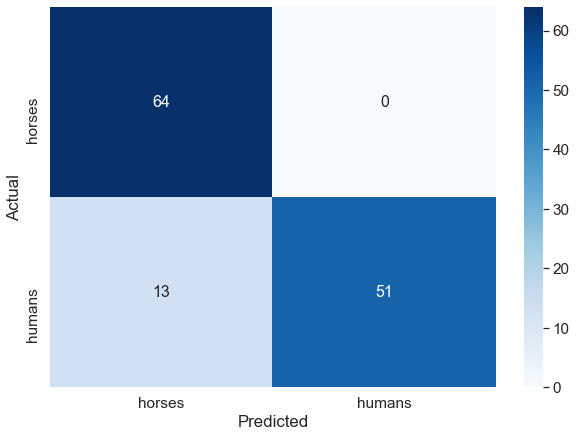

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sn 
import matplotlib.pyplot as plt

test_pred, test_probas, test_accuracy = predict_g(X_test.T, Y_test, parameters)



cmatrix = confusion_matrix(Y_test.ravel(),test_pred.ravel())
y_true = ["horses","humans"]
y_pred = ["horses","humans"]
df_cm = pd.DataFrame(cmatrix, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})
#plt.savefig('cmatrix.png') #Saving the figure
plt.show()

In [22]:
#To save the confusion matrix
#plt.savefig('cmatrix.png')

<Figure size 432x288 with 0 Axes>